In [1]:
library(dplyr)
library(ggplot2)
library(qqman)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'qqman' was built under R version 3.6.3"


For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).





In [2]:
modelData=read.table("./model-test.txt",header=T)
head(modelData)

,value,STL,AttGRU,LR,STL.AttGRU.BP,BP,RF,LSTM,GRU
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15.04780,14.72621,14.88097,15.04742,14.66769,15.48169,17.28124,14.78516,14.70150
2,14.76195,14.52860,15.25177,14.97713,14.33756,15.82352,17.36649,15.07758,14.96865
3,14.80928,14.67036,15.15039,15.12241,14.52126,16.03159,17.33465,15.04838,14.93065
4,15.04290,14.32712,15.21042,15.29886,14.12558,16.19867,17.22210,15.14662,15.01705
5,15.04320,14.64509,15.00436,15.35506,14.53538,16.11246,17.34009,15.04021,14.89402
6,15.05832,14.58441,14.84153,15.29584,14.52174,16.17090,17.22300,14.90188,14.70191


In [ ]:
summary(lm_result)$coefficients

In [4]:
pointPlot <- function(plotData, pointColor,modelName) {
    colnames(plotData) <- c("V1", "V2")
    lm_result=lm('V1~V2',data=plotData)
    Rvalue=round(summary(lm_result)$r.squared,digits=5)
    fit_intercept=summary(lm_result)$coefficients[1,1]
    fit_slope=summary(lm_result)$coefficients[2,1]
    plus_or_minus='+'
    if (fit_intercept<0){
        plus_or_minus="-"
    }
    p <- ggplot(
        modelData, aes(x = value, y = STL)
    ) +
        geom_point(
            color=pointColor,
            size=3
            ) +
        theme_bw() +
        geom_abline(
            intercept = fit_intercept,
            slope = fit_slope,
            color='blue',
            size=1
        ) +
        geom_abline(
            intercept = 0,
            slope = 1,
            linetype = "dashed",
            size=1
        ) +
        annotate(
            geom = "text", x = 25, y = 12,
            label = paste("R-squared: ",Rvalue,sep=""), hjust = "left",
            size = 6
        ) +
        annotate("segment", x = 25, xend = 30, y = 8, yend = 8, size = 1, colour = "blue") +
        annotate("text", x = 31.5, y = 8, label = "Fit", size = 6) +
        annotate("segment", x = 25, xend = 30, y = 5, yend = 5, size = 1, colour = "black", linetype = "dashed") +
        annotate("text", x = 31.5, y = 5, label = "y~x", size = 6) +
        annotate("text", x = 20, y = 35, 
        label = paste(
            'y=',round(fit_slope,digits=2),'*x ',plus_or_minus," ",abs(round(fit_intercept,digits=2)),sep=""
        ), size = 8) +
        theme(
            axis.text = element_text(size = 12, color = "black"),
            axis.title = element_text(size = 16, color = "black")
        ) +
        # scale_x_continuous(limits = c(0,45))+
        # scale_y_continuous(limits = c(0,45))+
        xlab(paste("True value"," (",modelName,")",sep="")) +
        ylab("Estimated value")
    return(p)
}

png 
  2

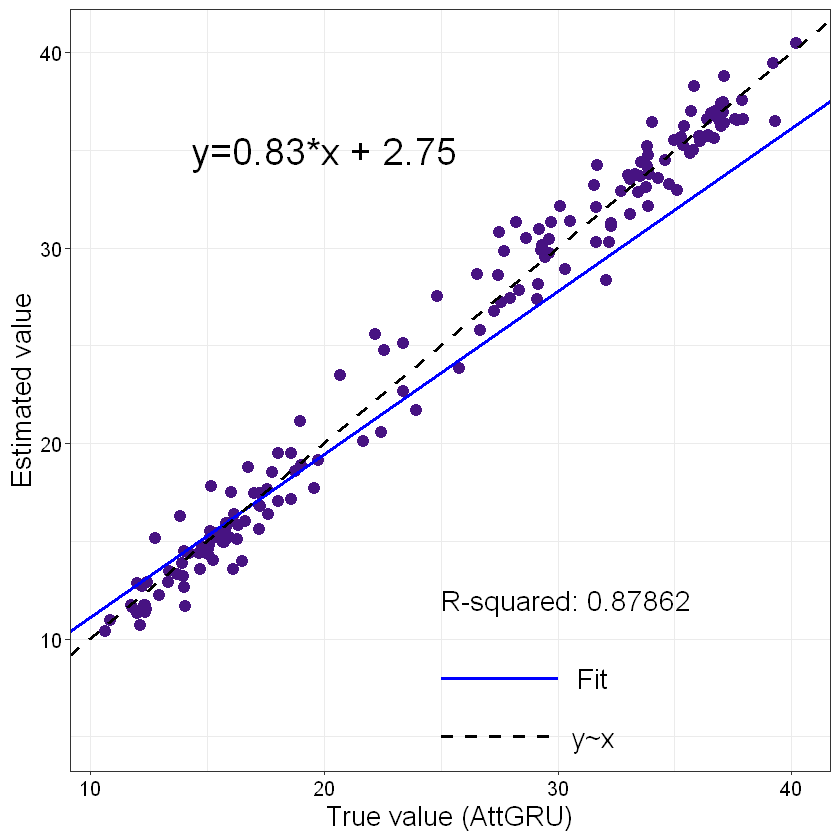

In [7]:
p=pointPlot(
    modelData %>% select(c("value","AttGRU")),
    '#471382',
    "AttGRU"
)
png("AttGRU_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

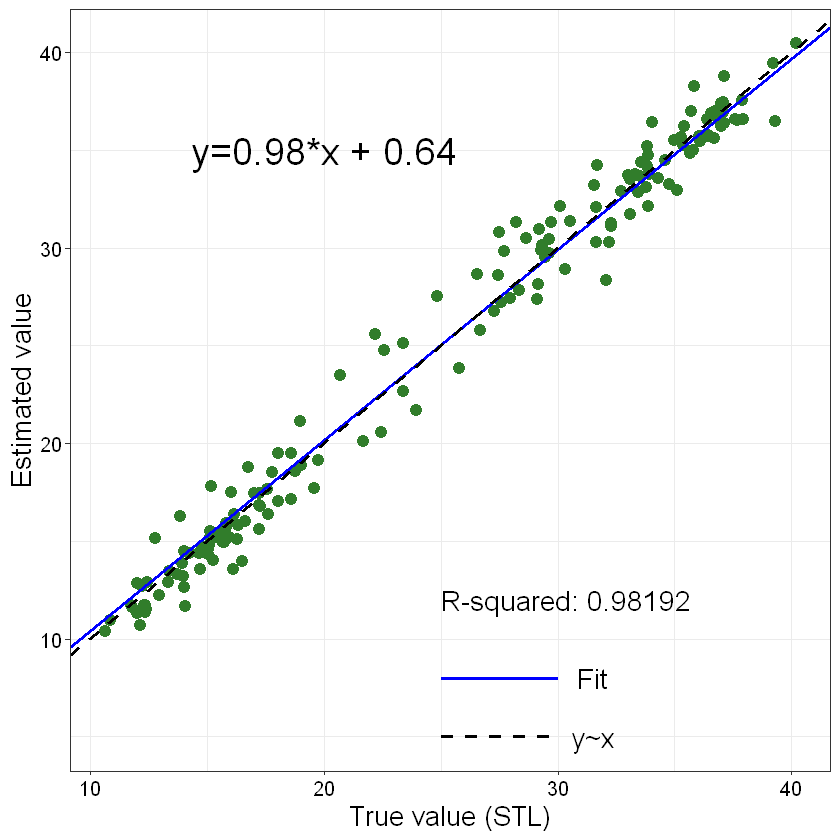

In [8]:
p=pointPlot(
    modelData %>% select(c("value","STL")),
    '#317d2b',
    "STL"
)
png("STL_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

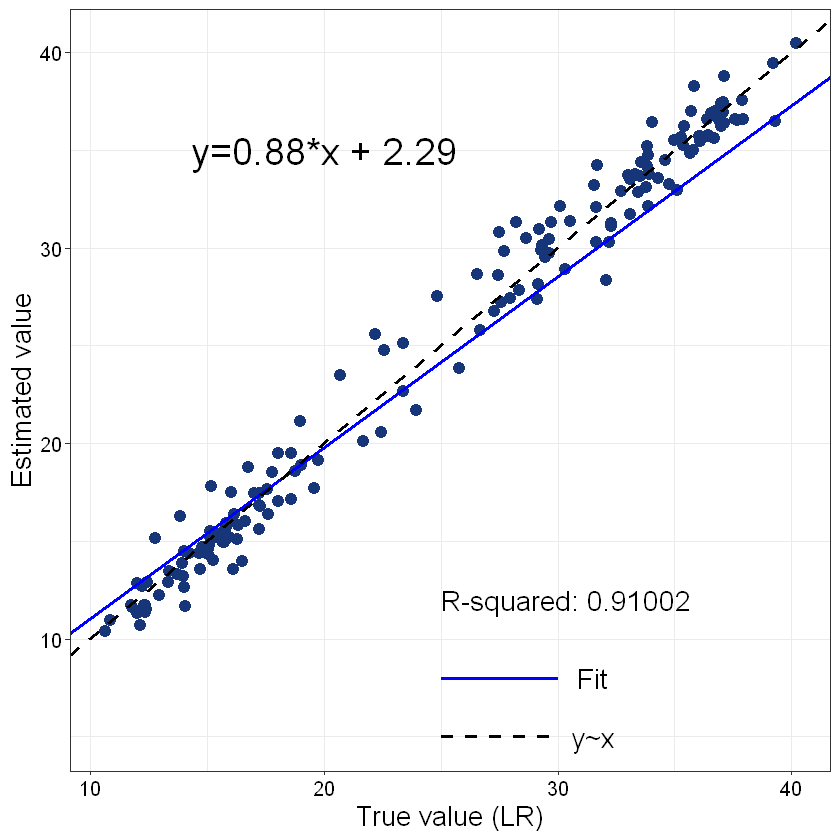

In [9]:
p=pointPlot(
    modelData %>% select(c("value","LR")),
    '#173579',
    "LR"
)
png("LR_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

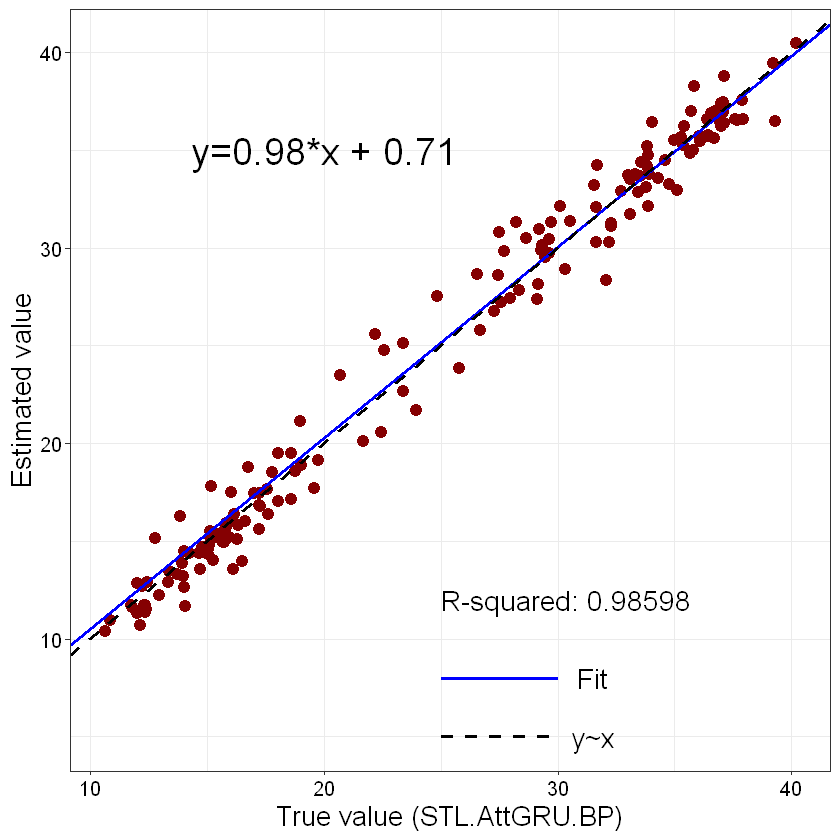

In [11]:
p=pointPlot(
    modelData %>% select(c("value","STL.AttGRU.BP")),
    '#850002',
    "STL.AttGRU.BP"
)
png("STL.AttGRU.BP_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

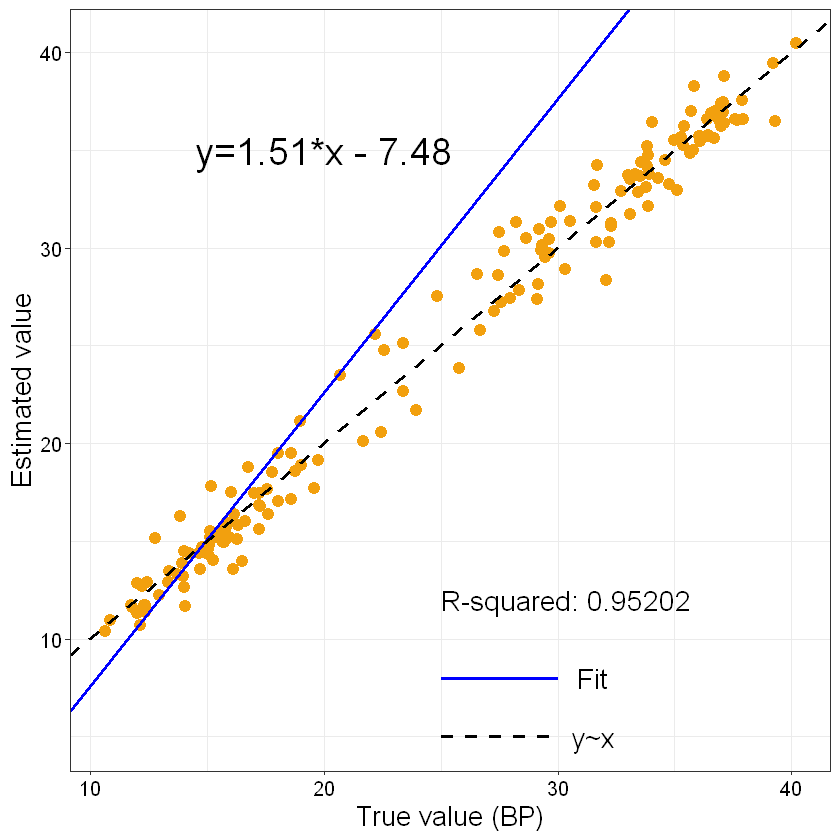

In [12]:
p=pointPlot(
    modelData %>% select(c("value","BP")),
    '#f2a00e',
    "BP"
)
png("BP_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

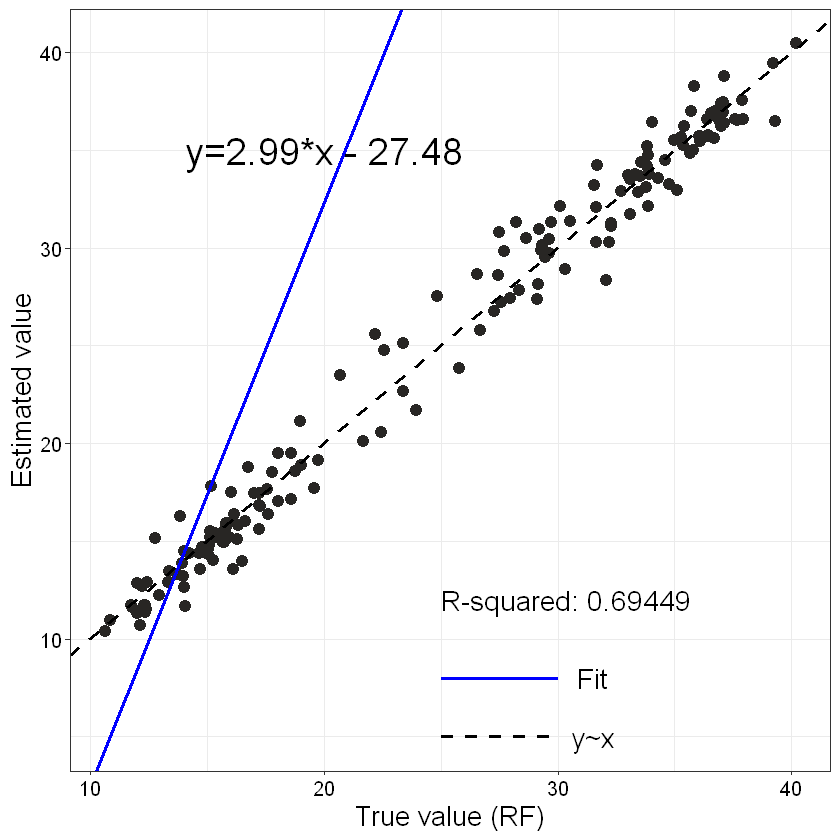

In [13]:
p=pointPlot(
    modelData %>% select(c("value","RF")),
    '#282624',
    "RF"
)
png("RF_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

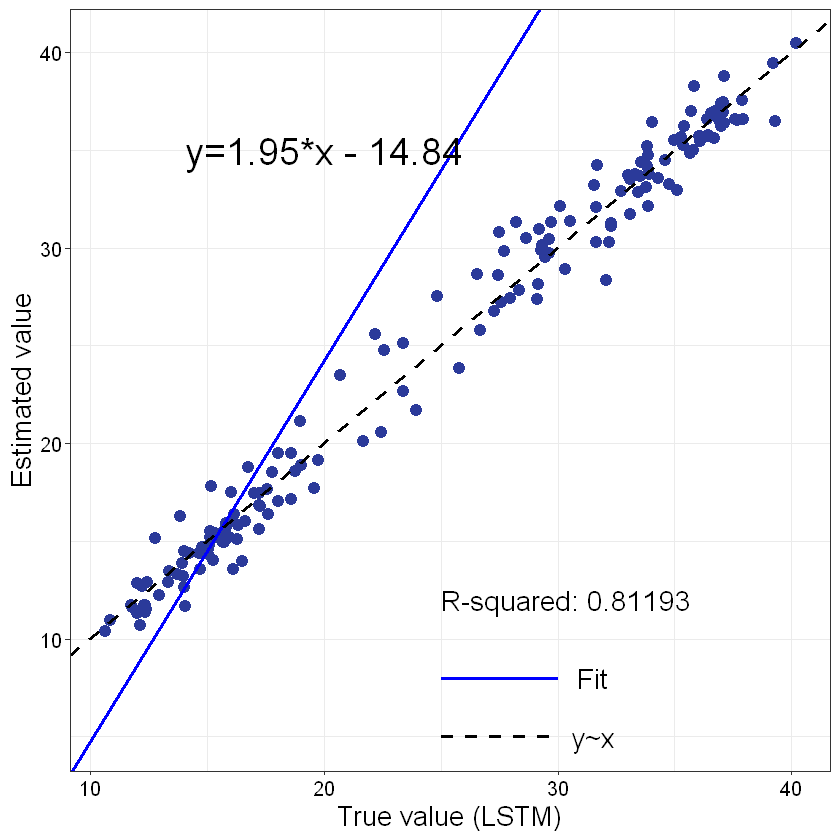

In [14]:
p=pointPlot(
    modelData %>% select(c("value","LSTM")),
    '#2b3a9a',
    "LSTM"
)
png("LSTM_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p

png 
  2

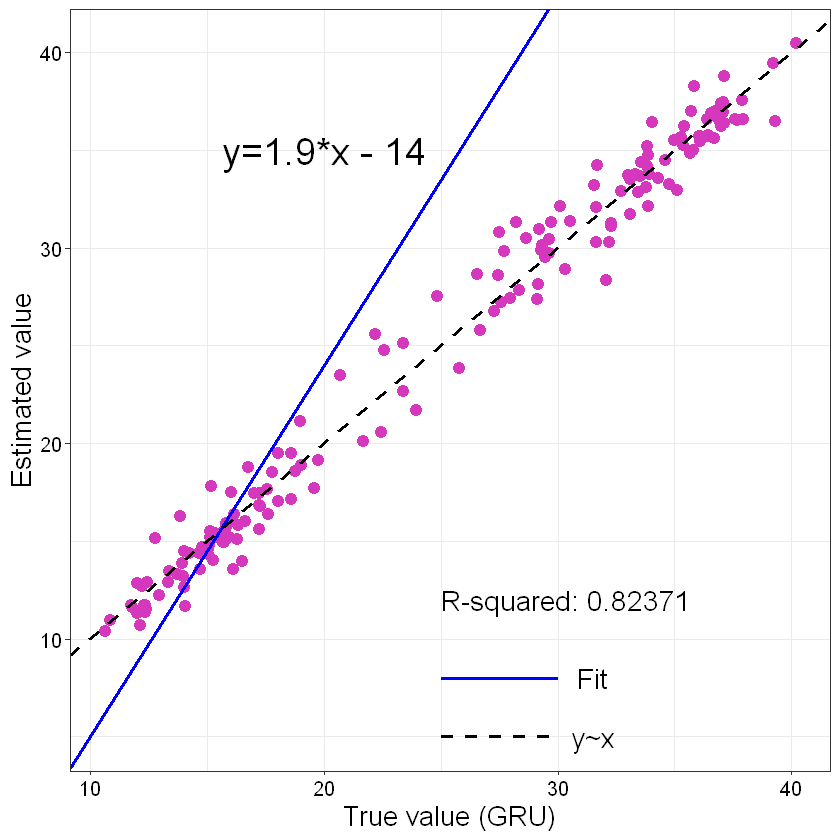

In [15]:
p=pointPlot(
    modelData %>% select(c("value","GRU")),
    '#d538bc',
    "GRU"
)
png("GRU_model.png",res=1000,width = 4800,height = 4800)
print(p)
dev.off()
p